In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from l5kit_conflict.analysis.post_process import load_l5kit_potential_conflicts


np.set_printoptions(suppress=True)
plt.style.use("ggplot")

C:\Users\LocalAdmin\Documents\GitHub\lyft_intersection\l5kit\l5kit\l5kit\dataset\select_agents.py:31: UserWarning: Windows detected. BLOSC_NOLOCK has not been set as it causes memory leaks on Windows.However, writing the mask with this config may be inconsistent.
  warnings.warn(


In [2]:
AVHV_potential_conflict_dataset, HVHV_potential_conflict_dataset = load_l5kit_potential_conflicts()

1> Loading pickle files ...
HVHV dataset #samples: 739
AVHV dataset #samples: 678
2> Removing unnecessary conflicts ...
HVHV dataset #samples: 608
AVHV dataset #samples: 508
3> Removing AVHV conflicts with non-continuous AV trajectories ...
HVHV dataset #samples: 608
AVHV dataset #samples: 479
4> Post-processing the complex potential conflicts ...
HVHV dataset #samples: 459
AVHV dataset #samples: 400


In [8]:
# %%time

truncate = False
n_frames_truncated = 10
#############################################################

print("[1/2] Calculating indictors based on HVHV dataset ...")

HVHV_PETs = []
HVHV_leader_vs, HVHV_follower_vs = [], []
HVHV_leader_average_vs, HVHV_follower_average_vs = [], []
HVHV_MaxReqDecs, HVHV_MeanReqDecs = [], []

for conflict in tqdm(HVHV_potential_conflict_dataset):

    is_success, req_decs = conflict.req_dec(truncate, n_frames_truncated)
    
    if is_success:
        HVHV_PETs.append(conflict.PET)
        HVHV_leader_vs.append(conflict.first_veh_speed_at_conflict)
        HVHV_follower_vs.append(conflict.second_veh_speed_at_conflict)
        HVHV_leader_average_vs.append(conflict.first_veh_average_speed)
        HVHV_follower_average_vs.append(conflict.second_veh_average_speed)
        HVHV_MaxReqDecs.append(np.max(req_decs))
        HVHV_MeanReqDecs.append(np.mean(req_decs))
    else:
        continue
        
##############################################################

print("[2/2] Calculating indictors based on AVHV dataset ...")

AVHV_PETs, HVAV_PETs = [], []
AVHV_leader_vs, HVAV_leader_vs = [], []
AVHV_follower_vs, HVAV_follower_vs = [], []
AVHV_leader_average_vs, HVAV_leader_average_vs = [], []
AVHV_follower_average_vs, HVAV_follower_average_vs = [], []
AVHV_MaxReqDecs, HVAV_MaxReqDecs = [], []
AVHV_MeanReqDecs, HVAV_MeanReqDecs = [], []

hvav_cross = 0

for conflict in tqdm(AVHV_potential_conflict_dataset):

    is_success, req_decs = conflict.req_dec(truncate, n_frames_truncated)
    
    if is_success:
        PET = conflict.PET
        first_conflict_speed = conflict.first_veh_speed_at_conflict
        second_conflic_speed = conflict.second_veh_speed_at_conflict
        first_veh_average_speed = conflict.first_veh_average_speed
        second_veh_average_speed = conflict.second_veh_average_speed
        if conflict.is_first_AV:
            AVHV_PETs.append(PET)
            AVHV_leader_vs.append(first_conflict_speed)
            AVHV_follower_vs.append(second_conflic_speed)
            AVHV_leader_average_vs.append(first_veh_average_speed)
            AVHV_follower_average_vs.append(second_veh_average_speed)
            AVHV_MaxReqDecs.append(np.max(req_decs))
            AVHV_MeanReqDecs.append(np.mean(req_decs))
            
        else:
            HVAV_PETs.append(PET)
            HVAV_leader_vs.append(first_conflict_speed)
            HVAV_follower_vs.append(second_conflic_speed)
            HVAV_leader_average_vs.append(first_veh_average_speed)
            HVAV_follower_average_vs.append(second_veh_average_speed)
            HVAV_MaxReqDecs.append(np.max(req_decs))
            HVAV_MeanReqDecs.append(np.mean(req_decs))

            if conflict.category == "cross":
                hvav_cross += 1
    else:
        continue

hvav_cross

[1/2] Calculating indictors based on HVHV dataset ...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 459/459 [00:02<00:00, 203.46it/s]


[2/2] Calculating indictors based on AVHV dataset ...


  4%|████▏                                                                                                                 | 14/400 [00:00<00:02, 138.61it/s]C:\Users\LocalAdmin\Documents\GitHub\lyft_intersection\extract_intersections\l5kit_conflict\analysis\conflict.py:204: RuntimeWarning: invalid value encountered in scalar divide
  req_dec = 0.5 * second_speed**2 / len_second_traj
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:03<00:00, 128.12it/s]


64

Draw plots: x: PET, y: average speed


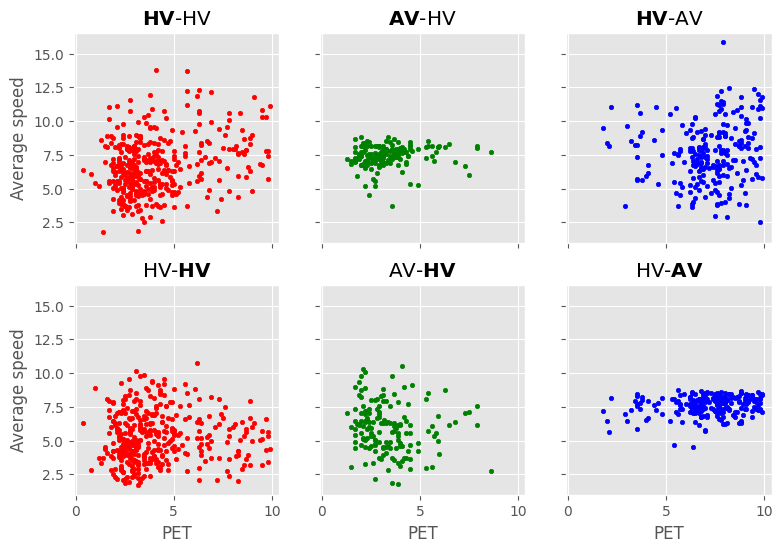

Draw plots: x: PET, y: conflict speed


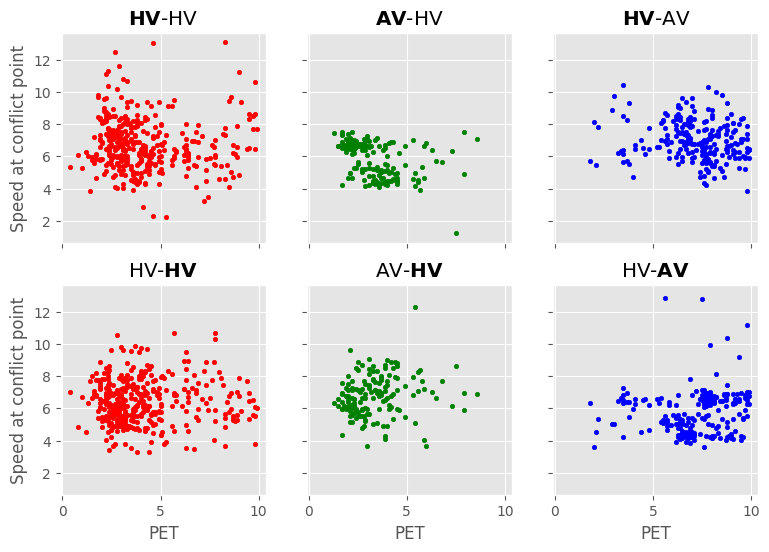

In [4]:
print("Draw plots: x: PET, y: average speed")

fig, axs = plt.subplots(2, 3, figsize=(9, 6), sharey=True, sharex=True)

sca00 = axs[0, 0].scatter(x=HVHV_PETs, y=HVHV_leader_average_vs, s=10, marker="o", c='r')
sca01 = axs[0, 1].scatter(x=AVHV_PETs, y=AVHV_leader_average_vs, s=10, marker="o", c='g')
sca02 = axs[0, 2].scatter(x=HVAV_PETs, y=HVAV_leader_average_vs, s=10, marker="o", c='b')

sca10 = axs[1, 0].scatter(x=HVHV_PETs, y=HVHV_follower_average_vs, s=10, marker="o", c='r')
sca11 = axs[1, 1].scatter(x=AVHV_PETs, y=AVHV_follower_average_vs, s=10, marker="o", c='g')
sca12 = axs[1, 2].scatter(x=HVAV_PETs, y=HVAV_follower_average_vs, s=10, marker="o", c='b')

# subfigure titles
axs[0, 0].set_title(r"$\bf{HV}$-HV")
axs[0, 1].set_title(r"$\bf{AV}$-HV")
axs[0, 2].set_title(r"$\bf{HV}$-AV")

axs[1, 0].set_title(r"HV-$\bf{HV}$")
axs[1, 1].set_title(r"AV-$\bf{HV}$")
axs[1, 2].set_title(r"HV-$\bf{AV}$")

# x axis
axs[1, 0].set_xlabel("PET")
axs[1, 1].set_xlabel("PET")
axs[1, 2].set_xlabel("PET")

# y axis
axs[0, 0].set_ylabel("Average speed")
axs[1, 0].set_ylabel("Average speed")
# axs[0, 0].set_ylabel("Speed at conflict point")

plt.show()

print("Draw plots: x: PET, y: conflict speed")

fig, axs = plt.subplots(2, 3, figsize=(9, 6), sharey=True, sharex=True)

sca00 = axs[0, 0].scatter(x=HVHV_PETs, y=HVHV_leader_vs, s=10, marker="o", c='r')
sca01 = axs[0, 1].scatter(x=AVHV_PETs, y=AVHV_leader_vs, s=10, marker="o", c='g')
sca02 = axs[0, 2].scatter(x=HVAV_PETs, y=HVAV_leader_vs, s=10, marker="o", c='b')

sca10 = axs[1, 0].scatter(x=HVHV_PETs, y=HVHV_follower_vs, s=10, marker="o", c='r')
sca11 = axs[1, 1].scatter(x=AVHV_PETs, y=AVHV_follower_vs, s=10, marker="o", c='g')
sca12 = axs[1, 2].scatter(x=HVAV_PETs, y=HVAV_follower_vs, s=10, marker="o", c='b')

# subfigure titles
axs[0, 0].set_title(r"$\bf{HV}$-HV")
axs[0, 1].set_title(r"$\bf{AV}$-HV")
axs[0, 2].set_title(r"$\bf{HV}$-AV")

axs[1, 0].set_title(r"HV-$\bf{HV}$")
axs[1, 1].set_title(r"AV-$\bf{HV}$")
axs[1, 2].set_title(r"HV-$\bf{AV}$")

# x axis
axs[1, 0].set_xlabel("PET")
axs[1, 1].set_xlabel("PET")
axs[1, 2].set_xlabel("PET")

# y axis
axs[0, 0].set_ylabel("Speed at conflict point")
axs[1, 0].set_ylabel("Speed at conflict point")
# axs[0, 0].set_ylabel("Speed at conflict point")

plt.show()

Draw plots: x: PET, y: conflict speed, z: mean/max req dec ...


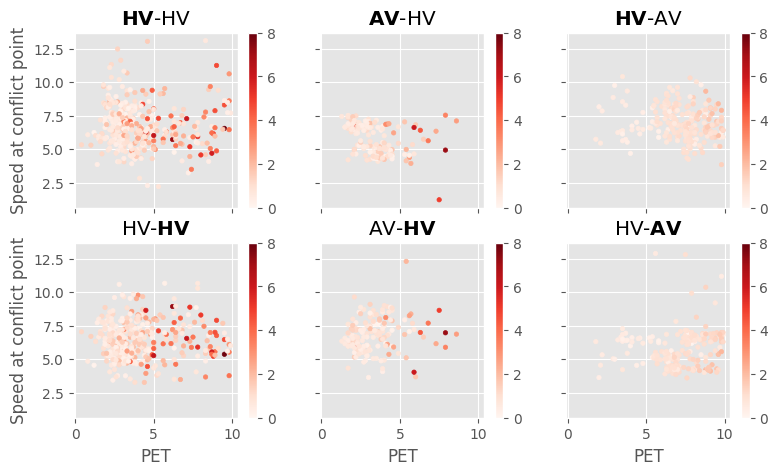

In [5]:
print("Draw plots: x: PET, y: conflict speed, z: mean/max req dec ...")

fig, axs = plt.subplots(2, 3, figsize=(9, 5), sharey=True, sharex=True)

sca00 = axs[0, 0].scatter(x=HVHV_PETs, y=HVHV_leader_vs, s=10, marker="o", c=HVHV_MeanReqDecs, cmap="Reds", vmin=0, vmax=8)
sca01 = axs[0, 1].scatter(x=AVHV_PETs, y=AVHV_leader_vs, s=10, marker="o", c=AVHV_MeanReqDecs, cmap="Reds", vmin=0, vmax=8)
sca02 = axs[0, 2].scatter(x=HVAV_PETs, y=HVAV_leader_vs, s=10, marker="o", c=HVAV_MeanReqDecs, cmap="Reds", vmin=0, vmax=8)

sca10 = axs[1, 0].scatter(x=HVHV_PETs, y=HVHV_follower_vs, s=10, marker="o", c=HVHV_MeanReqDecs, cmap="Reds", vmin=0, vmax=8)
sca11 = axs[1, 1].scatter(x=AVHV_PETs, y=AVHV_follower_vs, s=10, marker="o", c=AVHV_MeanReqDecs, cmap="Reds", vmin=0, vmax=8)
sca12 = axs[1, 2].scatter(x=HVAV_PETs, y=HVAV_follower_vs, s=10, marker="o", c=HVAV_MeanReqDecs, cmap="Reds", vmin=0, vmax=8)

# subfigure titles
axs[0, 0].set_title(r"$\bf{HV}$-HV")
axs[0, 1].set_title(r"$\bf{AV}$-HV")
axs[0, 2].set_title(r"$\bf{HV}$-AV")

axs[1, 0].set_title(r"HV-$\bf{HV}$")
axs[1, 1].set_title(r"AV-$\bf{HV}$")
axs[1, 2].set_title(r"HV-$\bf{AV}$")

# x axis
axs[1, 0].set_xlabel("PET")
axs[1, 1].set_xlabel("PET")
axs[1, 2].set_xlabel("PET")

# y axis
axs[0, 0].set_ylabel("Speed at conflict point")
axs[1, 0].set_ylabel("Speed at conflict point")
# axs[0, 0].set_ylabel("Speed at conflict point")

# colorbars
plt.colorbar(sca00, ax=axs[0, 0])
plt.colorbar(sca01, ax=axs[0, 1])
plt.colorbar(sca02, ax=axs[0, 2])
plt.colorbar(sca00, ax=axs[1, 0])
plt.colorbar(sca01, ax=axs[1, 1])
plt.colorbar(sca02, ax=axs[1, 2])

plt.show()

Draw plots: x: PET, y: conflict speed, z: mean/max req dec ...


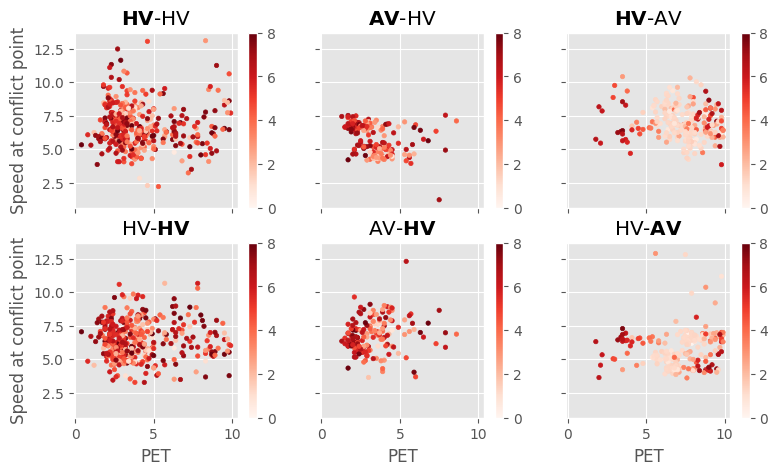

In [6]:
print("Draw plots: x: PET, y: conflict speed, z: mean/max req dec ...")

fig, axs = plt.subplots(2, 3, figsize=(9, 5), sharey=True, sharex=True)

sca00 = axs[0, 0].scatter(x=HVHV_PETs, y=HVHV_leader_vs, s=10, marker="o", c=HVHV_MaxReqDecs, cmap="Reds", vmin=0, vmax=8)
sca01 = axs[0, 1].scatter(x=AVHV_PETs, y=AVHV_leader_vs, s=10, marker="o", c=AVHV_MaxReqDecs, cmap="Reds", vmin=0, vmax=8)
sca02 = axs[0, 2].scatter(x=HVAV_PETs, y=HVAV_leader_vs, s=10, marker="o", c=HVAV_MaxReqDecs, cmap="Reds", vmin=0, vmax=8)

sca10 = axs[1, 0].scatter(x=HVHV_PETs, y=HVHV_follower_vs, s=10, marker="o", c=HVHV_MaxReqDecs, cmap="Reds", vmin=0, vmax=8)
sca11 = axs[1, 1].scatter(x=AVHV_PETs, y=AVHV_follower_vs, s=10, marker="o", c=AVHV_MaxReqDecs, cmap="Reds", vmin=0, vmax=8)
sca12 = axs[1, 2].scatter(x=HVAV_PETs, y=HVAV_follower_vs, s=10, marker="o", c=HVAV_MaxReqDecs, cmap="Reds", vmin=0, vmax=8)

# subfigure titles
axs[0, 0].set_title(r"$\bf{HV}$-HV")
axs[0, 1].set_title(r"$\bf{AV}$-HV")
axs[0, 2].set_title(r"$\bf{HV}$-AV")

axs[1, 0].set_title(r"HV-$\bf{HV}$")
axs[1, 1].set_title(r"AV-$\bf{HV}$")
axs[1, 2].set_title(r"HV-$\bf{AV}$")

# x axis
axs[1, 0].set_xlabel("PET")
axs[1, 1].set_xlabel("PET")
axs[1, 2].set_xlabel("PET")

# y axis
axs[0, 0].set_ylabel("Speed at conflict point")
axs[1, 0].set_ylabel("Speed at conflict point")
# axs[0, 0].set_ylabel("Speed at conflict point")

# colorbars
plt.colorbar(sca00, ax=axs[0, 0])
plt.colorbar(sca01, ax=axs[0, 1])
plt.colorbar(sca02, ax=axs[0, 2])
plt.colorbar(sca00, ax=axs[1, 0])
plt.colorbar(sca01, ax=axs[1, 1])
plt.colorbar(sca02, ax=axs[1, 2])

plt.show()

Draw plots: x: PET, y: conflict speed, z: max req dec ...


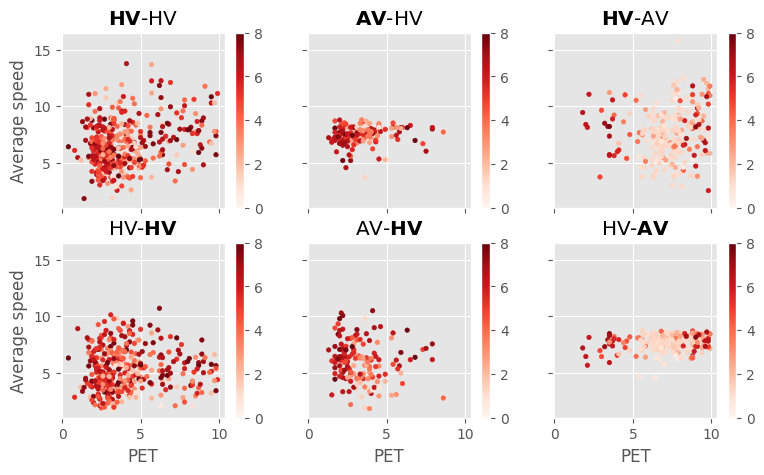

In [7]:
print("Draw plots: x: PET, y: conflict speed, z: max req dec ...")

fig, axs = plt.subplots(2, 3, figsize=(9, 5), sharey=True, sharex=True)

sca00 = axs[0, 0].scatter(x=HVHV_PETs, y=HVHV_leader_average_vs, s=10, marker="o", c=HVHV_MaxReqDecs, cmap="Reds", vmin=0, vmax=8)
sca01 = axs[0, 1].scatter(x=AVHV_PETs, y=AVHV_leader_average_vs, s=10, marker="o", c=AVHV_MaxReqDecs, cmap="Reds", vmin=0, vmax=8)
sca02 = axs[0, 2].scatter(x=HVAV_PETs, y=HVAV_leader_average_vs, s=10, marker="o", c=HVAV_MaxReqDecs, cmap="Reds", vmin=0, vmax=8)

sca10 = axs[1, 0].scatter(x=HVHV_PETs, y=HVHV_follower_average_vs, s=10, marker="o", c=HVHV_MaxReqDecs, cmap="Reds", vmin=0, vmax=8)
sca11 = axs[1, 1].scatter(x=AVHV_PETs, y=AVHV_follower_average_vs, s=10, marker="o", c=AVHV_MaxReqDecs, cmap="Reds", vmin=0, vmax=8)
sca12 = axs[1, 2].scatter(x=HVAV_PETs, y=HVAV_follower_average_vs, s=10, marker="o", c=HVAV_MaxReqDecs, cmap="Reds", vmin=0, vmax=8)

# subfigure titles
axs[0, 0].set_title(r"$\bf{HV}$-HV")
axs[0, 1].set_title(r"$\bf{AV}$-HV")
axs[0, 2].set_title(r"$\bf{HV}$-AV")

axs[1, 0].set_title(r"HV-$\bf{HV}$")
axs[1, 1].set_title(r"AV-$\bf{HV}$")
axs[1, 2].set_title(r"HV-$\bf{AV}$")

# x axis
axs[1, 0].set_xlabel("PET")
axs[1, 1].set_xlabel("PET")
axs[1, 2].set_xlabel("PET")

# y axis
axs[0, 0].set_ylabel("Average speed")
axs[1, 0].set_ylabel("Average speed")
# axs[0, 0].set_ylabel("Speed at conflict point")

# colorbars
plt.colorbar(sca00, ax=axs[0, 0])
plt.colorbar(sca01, ax=axs[0, 1])
plt.colorbar(sca02, ax=axs[0, 2])
plt.colorbar(sca00, ax=axs[1, 0])
plt.colorbar(sca01, ax=axs[1, 1])
plt.colorbar(sca02, ax=axs[1, 2])

plt.show()